In [44]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# read data
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [46]:
len(words)

32033

In [47]:
# build vocab and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [48]:
torch.

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

Prepare dataset...
182573 22790 22783
tensor([[ 0,  0,  0],
        [ 0,  0,  4],
        [ 0,  4,  1],
        [ 4,  1,  9],
        [ 1,  9, 10]]) tensor([ 4,  1,  9, 10, 15])
Init NN...
C torch.Size([27, 10])
W1 torch.Size([30, 300])
W2 torch.Size([300, 27])
Trainning loop started...
final loss 2.0737812519073486
camerestanly.
helmi.
boscan.
yydan.
yaetramya.
dhalomeer.
jewmourreoi.
taviannyssiliee.
dya.
rayyee.
finan.
zyne.
caraitra.
keella.
iar.
mekwun.
uzzarin.
dey.
ammanah.
fine.


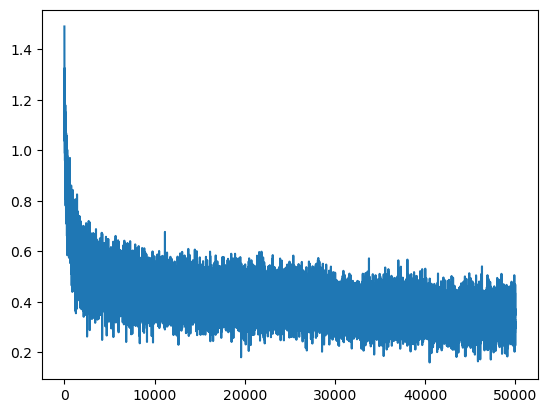

In [245]:
# exercise:
#
# 1. build the trainning dataset
# 2. create the NN
# 3. write the tranning loop

BLOCK_SIZE = 3
EMBD_SIZE = 10
TRAINING_ITERATIONS = 50000
LR_DECAY_THRESHOLDS = (30000, 40000)
HIDDEN_SIZE = 300

# Prepare dataset
# ----------------------------
print('Prepare dataset...')
def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * BLOCK_SIZE
        w = w + '.'
        # print(context)
        for c in w:
            ix = stoi[c]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

        # [print(x, '->', y) for x, y in zip(X, Y)]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

# build_dataset(words[:5])

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

print(len(Xtr), len(Xdev), len(Xtest))
print(Xtr[:5], Ytr[:5])
print('====================')
# ----------------------------

# Init NN
# ----------------------------
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,EMBD_SIZE), generator=g)
W1 = torch.randn((BLOCK_SIZE*EMBD_SIZE, HIDDEN_SIZE), generator=g)
b1 = torch.randn(HIDDEN_SIZE, generator=g)
W2 = torch.randn((HIDDEN_SIZE, 27), generator=g)
b2 = torch.randn(27, generator=g)
params = [C, W1, b1, W2, b2]
for p in params:
    p.requires_grad = True

print("Init NN...")
print('C', C.shape)
print('W1', W1.shape)
print('W2', W2.shape)
# ----------------------------

# trainning loop
# ----------------------------
print('Trainning loop started...')

# use an exponentially spaced learning rate to search for the best one
# NOTE the exponents is linearly spaced, the learning rates are exponentially spaced
lre = torch.linspace(-3, 0, TRAINING_ITERATIONS)
lrs = 10**lre
lri = []

steps = []
losses = []
for i in range(TRAINING_ITERATIONS):

    # impl mini batch of 32
    batch_i = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward
    embd = C[Xtr[batch_i]].view(-1, BLOCK_SIZE*EMBD_SIZE)
    h1 = torch.tanh(embd @ W1 + b1)
    logits = h1 @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[batch_i])
    # print('loss', loss.item())
    steps.append(i)
    losses.append(loss.log10().item())

    # backward
    for p in params:
        p.grad = None
    loss.backward()

    # update
    lr = 0.1
    if i > LR_DECAY_THRESHOLDS[0]:
        lr = 0.05
    if i > LR_DECAY_THRESHOLDS[1]:
        lr = 0.01
    for p in params:
        p.data += -lr * p.grad

    # log the exp of learning rate
    lri.append(lre[i])
    
print('final loss', loss.item())
plt.plot(losses)
# ----------------------------

# generate some names
# ----------------------------
for i in range(20):
    context = [0] * BLOCK_SIZE
    out = []
    while True:
        h = torch.tanh(C[context].view(-1, BLOCK_SIZE*EMBD_SIZE) @ W1 + b1)
        logits = h @ W2 + b2
        # # the follow lines are called the "softmax"
        # counts = logits.exp()
        # probs = counts / counts.sum()
        # ----------------------------
        probs = F.softmax(logits, dim=1)
        out_i = torch.multinomial(probs, 1, replacement=True).item()
        out_char = itos[out_i]
        out.append(out_char)
        if out_char == '.':
            break
        context = context[1:] + [out_i]

    print(''.join(out))


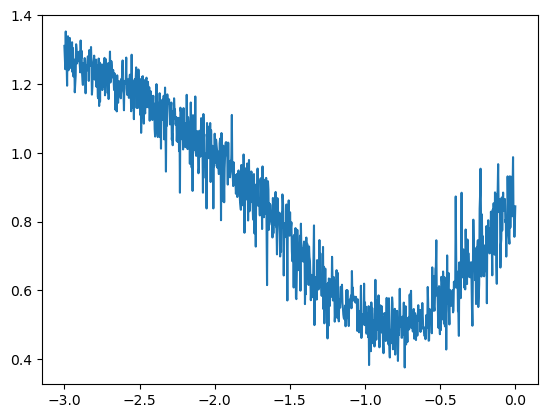

In [233]:
plt.plot(lri, losses)

# the plot shows that 0.1 a fairly good learning rate! :)

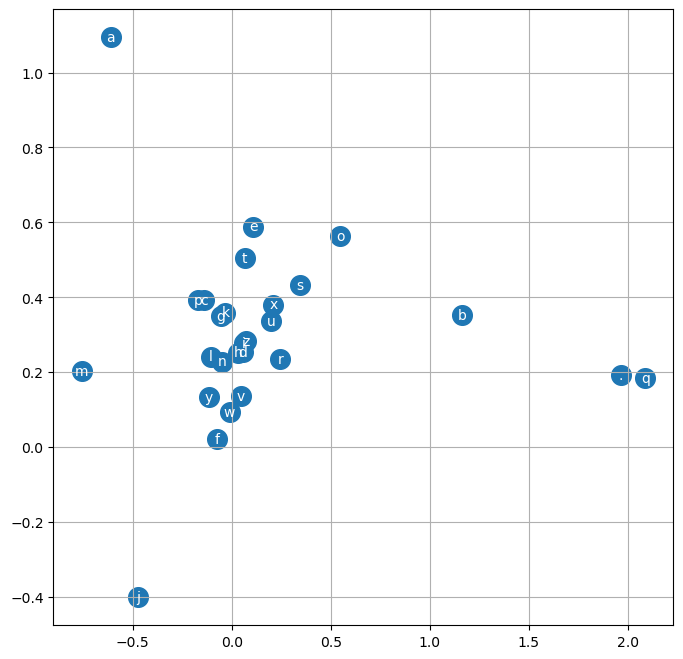

In [246]:
# only works for 2 dimensional embeddings

lt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [8]:
# build training set
def build_dataset(words):
    block_size = 3 # num of characters to support prediction

    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for c in w + '.':
            ix = stoi[c]
            X.append(context)
            Y.append(ix)

            # crop context
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)

    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [9]:
# build the embedding C

C = torch.randn((27, 2))

In [11]:
emb = C[Xtr]

In [12]:
emb.shape

torch.Size([182625, 3, 2])

In [15]:
W1 = torch.randn(())

In [16]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [17]:
# the -1 in first arg is a syntax for "inference the size"
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [18]:
h.shape

torch.Size([182625, 100])

In [19]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [20]:
logits = h @ W2 + b2

In [21]:
logits.shape

torch.Size([182625, 27])

In [22]:
counts = logits.exp()

In [23]:
prob = counts / counts.sum(1, keepdim=True)

In [24]:
prob.shape

torch.Size([182625, 27])

In [27]:
loss = -prob[torch.arange(len(Ytr)), Ytr].log().mean()
loss

tensor(17.3923)

In [141]:
# -------- cleaned up code for the network and training --------

In [29]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [30]:
sum([p.nelement() for p in parameters]) 

11897

In [31]:
for p in parameters:
    p.requires_grad = True

In [32]:
# lre = torch.linspace(-3, 0, 1000)
# lrs = 10**lre
# lrs

In [33]:
lri = []
lossi = []
stepi = []


In [34]:

for i in range(200000):
    
    # mini batch constrcut
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    # ---- the next 3 lines are what's called the "cross entropy" function ----
    # counts = logits.exp()
    # probs = counts / counts.sum(1, keepdim=True)
    # loss = -probs[torch.arange(probs.shape[0]), Y].log().mean() # likelihood estimation
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    # lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    stepi.append(i)
    # lri.append(lre[i])
    lossi.append(loss.log10().item())

print(loss.item())

1.6245691776275635


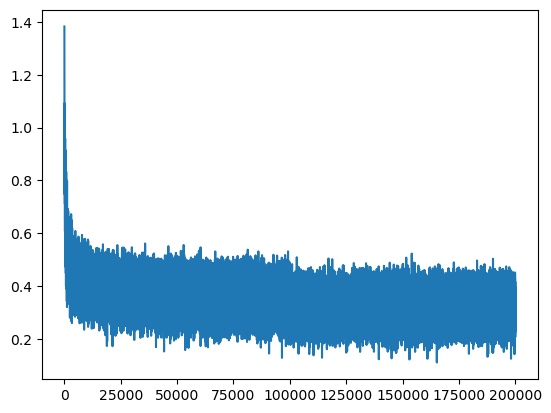

In [482]:
plt.plot(stepi, lossi)

In [483]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2

loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1675493717193604


In [484]:
emb = C[X]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2

loss = F.cross_entropy(logits, Y)
print(loss.item())

2.132896661758423


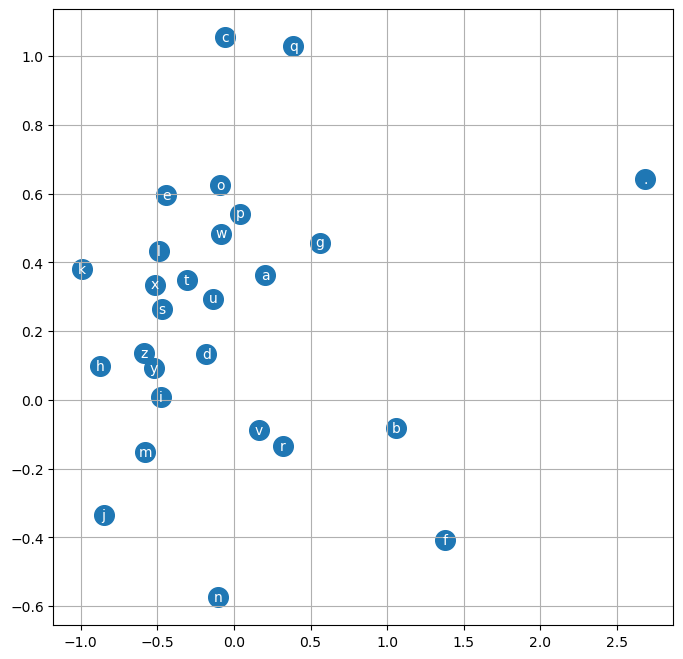

In [485]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [36]:
# sample from the the model!
g = torch.Generator().manual_seed(2147483647 + 10)
BLOCK_SIZE = 3

for _ in range(20):

    out = []
    context = [0] * BLOCK_SIZE # initialize with all ...
    while True:
        emb = C[torch.tensor(context)] # (1,block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))

carlah.
amelle.
khyrmyn.
reety.
skanden.
jazhuel.
delynn.
jareei.
ner.
kentziaiir.
kaleigh.
ham.
join.
quinn.
suline.
liveni.
wanthoniel.
yxin.
kaelynn.
demed.


In [ ]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [149]:
torch.randint(0, X.shape[0], (32, ))

tensor([ 57295, 210322,  61737,  88084, 198851,  22644, 152892,  52415,  14358,
        181431, 227473, 227082,  36032,  95649,  84189, 197174,  75890, 125710,
          1837,    203, 155611, 182066,  91353,  40721,  75284, 141126,  75837,
        141275,  58747,  91425,  80801, 220387])

In [137]:
logits.max(1)

torch.return_types.max(
values=tensor([13.4137, 17.9644, 20.6772, 20.7268, 16.8571, 13.4137, 16.1146, 14.2717,
        16.0139, 18.5009, 16.0738, 21.0530, 13.4137, 17.2578, 17.2659, 20.2016,
        13.4137, 16.7054, 15.2578, 17.2021, 18.6941, 16.1057, 10.9961, 10.7943,
        15.5882, 13.4137, 16.2897, 17.0882, 12.8241, 16.2913, 19.2258, 16.1885],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [138]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

## Appendix

In [21]:
# not good, have to change code each time emb dim changes
torch.cat([emb[:, 0, :], emb[:, 0, :], emb[:, 0, :]], dim=1).shape

torch.Size([32, 6])

In [27]:
# better, but still not the best way
torch.cat(torch.unbind(emb, dim=1), dim=1).shape

torch.Size([32, 6])

In [58]:
# introducing view()
a = torch.arange(18)
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

tensor([[ 0.8008,  0.0239,  0.8008,  0.0239,  0.8008,  0.0239],
        [ 0.8008,  0.0239,  0.8008,  0.0239,  0.1407,  0.3638],
        [ 0.8008,  0.0239,  0.1407,  0.3638,  0.8119,  2.0869],
        [ 0.1407,  0.3638,  0.8119,  2.0869,  0.8119,  2.0869],
        [ 0.8119,  2.0869,  0.8119,  2.0869, -2.1968, -0.3353],
        [ 0.8008,  0.0239,  0.8008,  0.0239,  0.8008,  0.0239],
        [ 0.8008,  0.0239,  0.8008,  0.0239,  0.8737,  0.1018],
        [ 0.8008,  0.0239,  0.8737,  0.1018, -0.7722, -3.0319],
        [ 0.8737,  0.1018, -0.7722, -3.0319,  0.0493, -0.1341],
        [-0.7722, -3.0319,  0.0493, -0.1341, -0.6516, -0.1165],
        [ 0.0493, -0.1341, -0.6516, -0.1165,  0.0493, -0.1341],
        [-0.6516, -0.1165,  0.0493, -0.1341, -2.1968, -0.3353],
        [ 0.8008,  0.0239,  0.8008,  0.0239,  0.8008,  0.0239],
        [ 0.8008,  0.0239,  0.8008,  0.0239, -2.1968, -0.3353],
        [ 0.8008,  0.0239, -2.1968, -0.3353, -0.6516, -0.1165],
        [-2.1968, -0.3353, -0.6516, -0.1